In [86]:
import pandas as pd
import numpy as np

pathDict = {
   # "femaleV1":{"rsp":"liwc_female_responses", "vals":"liwc_female_orig_mod_vals", "mod_feat":"liwc_femal_mod", "orig_feat":"liwc_femal_orig"},
    "femaleV2":{"rsp":"liwc_female_v2_responses", "vals":"liwc_female_orig_mod_vals", "mod_feat":"liwc_femal_mod", "orig_feat":"liwc_femal_orig"},
    "my_mine":{"rsp":"my_mine_responses_v2", "vals":"my_mine_orig_mod_vals", "mod_feat":"my_mine_mod", "orig_feat":"my_mine_orig"},
    "cond":{"rsp":"mine conditional v2", "vals":"cond_orig_mod_vals", "mod_feat":"liwc_female mod", "orig_feat":"liwc_female orig"},
}
experiment = "cond"
responses = pd.read_csv("../datasets/"+pathDict[experiment]["rsp"]+".csv") #Options: "liwc_female_responses.csv", "liwc_female_v2_responses.csv"
liwc_vals = pd.read_csv("../datasets/"+pathDict[experiment]["vals"]+".csv") #Options: "liwc_female_orig_mod_vals.csv", "my_mine_orig_mod_vals.csv"
print(liwc_vals.columns)
print(responses.columns)

Index(['post_id', 'liwc_female orig', 'AHR original predict',
       'AHR original actual', 'AHR modified predict', 'liwc_female mod',
       'conditional_feature_value', 'notes'],
      dtype='object')
Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'heartatk', 'consent',
       'scenario_1_action', 'scenario_1_person', 's1t_First Click',
       's1t_Last Click', 's1t_Page Submit', 's1t_Click Count',
       'scenario_2_action', 'scenario_2_person', 's2t_First Click',
       's2t_Last Click', 's2t_Page Submit', 's2t_Click Count',
       'scenario_3_action', 'scenario_3_person', 's3t_First Click',
       's3t_Last Click', 's3t_Page Submit', 's3t_Click Count',
       'scenario_4_action', 'scenario_4_person', 's4t_Firs

In [87]:
print(responses.shape)
valid_AC_count = responses.loc[(responses['AC'] == "1") | (responses['AC'] == "2") |(responses['AC'] == "3") |(responses['AC'] == "4") |(responses['AC'] == "5")].shape[0]
invalid_AC_count = responses.loc[(responses['AC'] != "1") & (responses['AC'] != "2") &(responses['AC'] != "3") &(responses['AC'] != "4") &(responses['AC'] != "5")].shape[0]
correct_AC_count = responses.loc[(responses['AC'] == "1") ].shape[0]
incorrect_AC_count = valid_AC_count-correct_AC_count
print("invalid acs", invalid_AC_count)
print("Number of participants:", valid_AC_count, "removed", incorrect_AC_count, "=>", correct_AC_count)


(910, 74)
invalid acs 46
Number of participants: 864 removed 19 => 845


In [88]:
print(responses['AC'].value_counts())
print(responses['q_3_is_modified'].isna().sum())


1                                                                 845
2                                                                   9
3                                                                   6
4                                                                   3
In this task, you read five passages that all dealt with what?      1
{"ImportId":"QID73"}                                                1
5                                                                   1
Name: AC, dtype: int64
443


In [89]:
df = responses.loc[(responses["heartatk"] =="4")& (responses["consent"] =="1")]

df_fil = df.dropna(subset=["scenario_1_action", "scenario_2_action", "scenario_3_action", "scenario_4_action", "scenario_5_action"])
df_fil = df_fil.dropna(subset=["scenario_1_person", "scenario_2_person", "scenario_3_person", "scenario_4_person", "scenario_5_person"])
df_fil = df_fil.dropna(subset=["q_1_id", "q_2_id", "q_3_id", "q_4_id", "q_5_id"])
print(df.shape)
colMax = {1: {"action":df_fil["scenario_1_action"].astype("int").max(), "person":df_fil["scenario_1_person"].astype("int").max()}, 2: {"action":df_fil["scenario_2_action"].astype("int").max(), "person":df_fil["scenario_2_person"].astype("int").max()}, 3: {"action":df_fil["scenario_3_action"].astype("int").max(), "person":df_fil["scenario_3_person"].astype("int").max()}, 4: {"action":df_fil["scenario_4_action"].astype("int").max(), "person":df_fil["scenario_4_person"].astype("int").max()}, 5: {"action":df_fil["scenario_5_action"].astype("int").max(), "person":df_fil["scenario_5_person"].astype("int").max()}, }
colMin = {1: {"action":df_fil["scenario_1_action"].astype("int").min(), "person":df_fil["scenario_1_person"].astype("int").min()}, 2: {"action":df_fil["scenario_2_action"].astype("int").min(), "person":df_fil["scenario_2_person"].astype("int").min()}, 3: {"action":df_fil["scenario_3_action"].astype("int").min(), "person":df_fil["scenario_3_person"].astype("int").min()}, 4: {"action":df_fil["scenario_4_action"].astype("int").min(), "person":df_fil["scenario_4_person"].astype("int").min()}, 5: {"action":df_fil["scenario_5_action"].astype("int").min(), "person":df_fil["scenario_5_person"].astype("int").min()}, }
print(colMax)
print(colMin)

(902, 74)
{1: {'action': 46, 'person': 44}, 2: {'action': 39, 'person': 37}, 3: {'action': 39, 'person': 37}, 4: {'action': 39, 'person': 37}, 5: {'action': 39, 'person': 37}}
{1: {'action': 40, 'person': 38}, 2: {'action': 33, 'person': 31}, 3: {'action': 33, 'person': 31}, 4: {'action': 33, 'person': 31}, 5: {'action': 33, 'person': 31}}


In [90]:
print(df['scenario_1_action'].value_counts())
print(df.shape)

40    282
41    143
42    126
44    120
43     91
46     64
45     62
Name: scenario_1_action, dtype: int64
(902, 74)


In [91]:
import math
from urllib import response
csv_col_modified = pathDict[experiment]["mod_feat"] 
csv_col_orig = pathDict[experiment]["orig_feat"]  

def is_float(element) -> bool:
    try:
        float(element)
        return True
    except ValueError:
        return False

def recodeValues(columnIdx, isAction, value):
    if str(value).strip().lower()=="nan":
        return None
    value = int(value)
    return value - colMin[columnIdx]["action" if isAction else "person"] +1
    
def getLiwcVals(type, id):
    col = csv_col_orig if type == "orig" else csv_col_modified
    #print(id)
    to_ret =liwc_vals.loc[liwc_vals["post_id"]==id][col].item()
    return float(to_ret)
    
new_format =[]
# New format is: id, is_modified, answer_action,answer_person

ac_fail_count = 0
badEntryCounter=0
participants =0
for index, row in df.iterrows():
    if "2022-08-01" in row["StartDate"]:
        continue
        print(row["StartDate"])
    dmy = str(row["gender"]).strip().lower()
    gender = None
    if dmy == "4":
        participants+=1
        gender =1
    elif dmy=="5":
        gender = -1
        participants+=1
    elif dmy=="6":
        gender = 2
        participants+=1
    elif dmy=="7":
        gender=3
        participants+=1
    else:
        badEntryCounter+=1

    for i in range(1,6):
        r_id = row[f"q_{i}_id"]
        #print(type(r_id))
        if  (is_float(r_id) and math.isnan(r_id)) or (r_id.isnumeric() and math.isnan(int(r_id))):
            badEntryCounter+=1
            #not sure if bad entry counter is correct or should be diveded by 4
            continue
       
        r_isMod = 1 if row[f"q_{i}_is_modified"] == "true" else -1
        r_action =  recodeValues(i, True, row[f"scenario_{i}_action"])
        r_person = recodeValues(i, False, row[f"scenario_{i}_person"])
        r_age = None if str(row["age"]).strip().lower() == "nan" else int(math.floor(float(row["age"]))) if "." in row["age"] else int(row["age"])
        r_gender = gender
        r_responseId = row["ResponseId"]
        r_ac = row["AC"]
        
        
        

        

        #print(r_id)
        if "IMTA for getting a cat" in r_id:
            r_id = "k5kh4d"
        r_liwcOrig = getLiwcVals("orig", r_id)
        r_liwcMod = getLiwcVals("modified", r_id)
        cond_low = ["k5n8gp","ayuhfj","d7rqv7","da5lf4","d8tktt","di121p","e6gioh","kbfqn0","d7bwco","lflkbi","ghb1qd","dq7o60","c16a49","azhjxy","b6ex3u","bt96e5","jmyghg","acx62a","cwd2sm","d11pwp"]
        cond_high=["bkd310","j0rubv","dhswh1","hptojb","eq475l","Ds0fwd","ikxa0t","jpgxl6","bt8iou","ec7ciw","ehyyhk","ck5jvn","m46pif","lol9kc","bs5p6l","dn6075","jncy5t","hql2q4","cjudzm","n2wjkt"]
        r_is_cond_high = 1 if r_id in cond_high else -1
        r_i = [r_id, r_isMod, r_action, r_person, r_age, r_gender, r_responseId, r_ac, r_liwcOrig, r_liwcMod, r_is_cond_high ]
        new_format.append(r_i)
    
    


print("NAN values:",badEntryCounter)
df_new_format = pd.DataFrame(np.array(new_format), columns=['scenarioId', 'isModified', 'scenarioAction', 'scenarioPerson', "age", "gender", "responseId", "acResponse", "originalFeatureValue", "modifiedFeatureValue", "isConditionalHigh"], )
df_new_format["isModified"] = df_new_format["isModified"].astype("float").astype("Int64")
df_new_format["scenarioAction"] = df_new_format["scenarioAction"].astype("float").astype("Int64")
df_new_format["scenarioPerson"] = df_new_format["scenarioPerson"].astype("float").astype("Int64")
df_new_format["gender"] = df_new_format["gender"].astype("float").astype("Int64")
df_new_format["age"] = df_new_format["age"].astype("float").astype("Int64")
df_new_format["originalFeatureValue"] = df_new_format["originalFeatureValue"].astype("float").astype("Float64")
df_new_format["modifiedFeatureValue"] = df_new_format["modifiedFeatureValue"].astype("float").astype("Float64")
df_new_format["isConditionalHigh"] = df_new_format["isConditionalHigh"].astype("float").astype("Int64")
df_new_format["acResponse"] = df_new_format["acResponse"].astype("float").astype("Int64")


nr_invalid = responses.shape[0]-participants
print("Number of participanst", str(responses.shape[0]), "\n  removed through AC=", str(ac_fail_count),"\nremoved through invalid response=", str(nr_invalid), "\nfinal number of participants=>", str(responses.shape[0]-ac_fail_count-nr_invalid),"\nTotal removed ", str(nr_invalid+ac_fail_count) )
print("TRANSFORMED OUTPUT STILL CONTAINS ATTENTION CHECK")

NAN values: 38
Number of participanst 910 
  removed through AC= 0 
removed through invalid response= 46 
final number of participants=> 864 
Total removed  46
TRANSFORMED OUTPUT STILL CONTAINS ATTENTION CHECK


4510
sum 4510
chiSquare Power_divergenceResult(statistic=32.829268292682926, pvalue=0.7462569949002829)


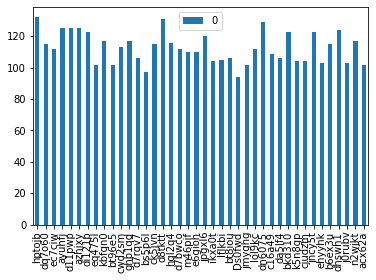

In [92]:
from collections import Counter

ids = list(map(lambda x:x[0],df_new_format[["scenarioId"]].values.tolist()))

print(len(ids))
id_counter = Counter(ids)
#df_new_format[["scenarioId"]].apply(pd.value_counts).plot(kind='bar', subplots=True)
#print(df_new_format.shape)
#print(df_new_format.dtypes)

df_counter = pd.DataFrame.from_dict(id_counter, orient='index')
df_counter.plot(kind='bar')
print("sum", np.sum(list(id_counter.values())))
from scipy.stats import chisquare
import random
rnd  = [random.randint(1, 20) for i in range(640)]

print("chiSquare", chisquare(list(id_counter.values())))



In [93]:
#print(df_new_format['scenarioPerson'].value_counts())
#print(df_new_format["originalFeatureValue"].head(10))
print(df_new_format.isna().sum())
print(df_new_format.isin(['nan']).sum(axis=0))

scenarioId                0
isModified                0
scenarioAction          134
scenarioPerson          134
age                     190
gender                  190
responseId                0
acResponse              190
originalFeatureValue      0
modifiedFeatureValue      0
isConditionalHigh         0
dtype: int64
scenarioId              0
isModified              0
scenarioAction          0
scenarioPerson          0
age                     0
gender                  0
responseId              0
acResponse              0
originalFeatureValue    0
modifiedFeatureValue    0
isConditionalHigh       0
dtype: int64


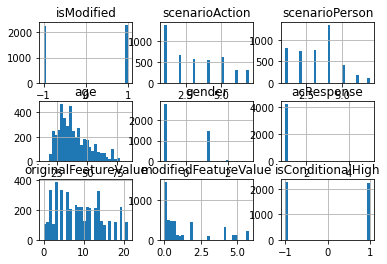

In [94]:
hist = df_new_format.hist(bins=30)

# average and std

In [95]:
print(df_new_format['isConditionalHigh'].unique())


<IntegerArray>
[1, -1]
Length: 2, dtype: Int64


In [96]:
#get average AHR for modified and unmodified
df_analyzed= df_new_format.loc[df_new_format['acResponse'] == 1]

#study 3
df_analyzed= df_analyzed.loc[df_analyzed['isConditionalHigh'] == -1]

df_modified = df_analyzed.loc[df_analyzed['isModified'] == 1]
df_unmodified = df_analyzed.loc[df_analyzed['isModified'] == -1]
print("MODIFIED")
print(df_modified.shape, df_modified.describe())
print("UNMODIFIED")
print(df_unmodified.shape, df_unmodified.describe())

MODIFIED
(1058, 11)        isModified  scenarioAction  scenarioPerson          age       gender  \
count      1058.0     1058.000000     1058.000000  1058.000000  1058.000000   
mean          1.0        3.107750        3.056711    39.573724    -0.265595   
std           0.0        1.851057        1.461132    12.945441     1.000647   
min           1.0        1.000000        1.000000    14.000000    -1.000000   
25%           1.0        1.000000        2.000000    30.000000    -1.000000   
50%           1.0        3.000000        3.000000    37.000000    -1.000000   
75%           1.0        5.000000        4.000000    47.000000     1.000000   
max           1.0        7.000000        7.000000    81.000000     3.000000   

       acResponse  originalFeatureValue  modifiedFeatureValue  \
count      1058.0           1058.000000           1058.000000   
mean          1.0              7.698904              1.113516   
std           0.0              4.434247              1.339418   
min     

     scenarioId  isModified  scenarioAction  scenarioPerson  age  gender  \
1437     n2wjkt           1               2               4   36       1   
1633     n2wjkt           1               1               3   38      -1   
4266     n2wjkt           1               2               3   31      -1   
1119     n2wjkt           1               4               4   65      -1   
2630     n2wjkt           1               2               2   58       1   

             responseId  acResponse  originalFeatureValue  \
1437  R_3MMYI1qa0vuLWMj           1                 21.15   
1633  R_1n2guKtYnQbmmPN           1                 21.15   
4266  R_1CJgtbIjIqBj4KM           1                 21.15   
1119  R_3J7VdBBIFa9Zyf6           1                 21.15   
2630  R_1CDblalHdtbw3PT           1                 21.15   

      modifiedFeatureValue  isConditionalHigh  
1437                  1.92                  1  
1633                  1.92                  1  
4266                  1.92      

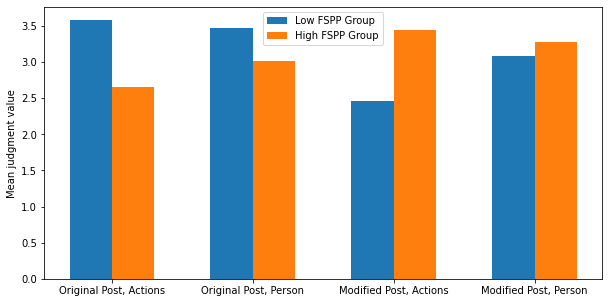

In [98]:
import matplotlib.pyplot as plt
df_analyzed= df_new_format.loc[df_new_format['acResponse'] == 1]

df_analyzed= df_analyzed.loc[df_analyzed['isConditionalHigh'] == 1]#only for study 3

df_modified = df_analyzed.loc[df_analyzed['isModified'] == 1].sort_values(by=['originalFeatureValue'], ascending=False)
df_unmodified = df_analyzed.loc[df_analyzed['isModified'] == -1].sort_values(by=['modifiedFeatureValue'], ascending=False)

print(df_modified.head(5))
print(df_unmodified.head(5))

modified_scenarioId_sorted = df_modified["scenarioId"].unique().tolist()
unmodified_scenarioId_sorted = df_unmodified["scenarioId"].unique().tolist()

if len(modified_scenarioId_sorted)!= 20:
    raise Exception("not 20 modified scearios ids", len(modified_scenarioId_sorted))

if len(unmodified_scenarioId_sorted)!= 20:
    raise Exception("not 20 modified scearios ids", len(unmodified_scenarioId_sorted))

print(modified_scenarioId_sorted)
print(modified_scenarioId_sorted[:10])
print(modified_scenarioId_sorted[-10:])

df_mod_h = df_modified.loc[df_modified['scenarioId'].isin(modified_scenarioId_sorted[:10])]
df_mod_l = df_modified.loc[df_modified['scenarioId'].isin(modified_scenarioId_sorted[-10:])]

df_umod_h = df_unmodified.loc[df_unmodified['scenarioId'].isin(unmodified_scenarioId_sorted[:10])]
df_umod_l = df_unmodified.loc[df_unmodified['scenarioId'].isin(unmodified_scenarioId_sorted[-10:])]


# Numbers of pairs of bars you want
N = 4
# Data on X-axis

# Specify the values of blue bars (height)
low_feature = (df_umod_l["scenarioAction"].mean(), df_umod_l["scenarioPerson"].mean(),df_mod_l["scenarioAction"].mean(), df_mod_l["scenarioPerson"].mean())
# Specify the values of orange bars (height)
high_feature = (df_umod_h["scenarioAction"].mean(), df_umod_h["scenarioPerson"].mean(),df_mod_h["scenarioAction"].mean(), df_mod_h["scenarioPerson"].mean())

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, low_feature , width, label='Low FSPP Group')
plt.bar(ind + width, high_feature, width, label='High FSPP Group')

plt.ylabel('Mean judgment value')
#plt.title('Comparison of average moral judgment of actions and person in the 10 highest and lowest LIWC Female posts for modified and unmodified posts.')

# xticks()
# First argument - A list of positions at which ticks should be placed
# Second argument -  A list of labels to place at the given locations
plt.xticks(ind + width / 2, ('Original Post, Actions', 'Original Post, Person', 'Modified Post, Actions', 'Modified Post, Person'))

# Finding the best position for legends and putting it
plt.legend(loc=("best"))
plt.show()

In [99]:
#merge with topic ids:
id_to_topics = pd.read_csv("../datasets/id_to_topics.csv")
df_new_format = df_new_format.merge(id_to_topics, left_on="scenarioId", right_on="post_id", suffixes=('', '_DROP')).filter(regex='^(?!.*_DROP)')
df_new_format=df_new_format.drop(columns=['post_id'])
print(df_new_format.head(10))
df_new_format.to_excel(pathDict[experiment]["rsp"]+"-transformed_final.xlsx", index=False)

  scenarioId  isModified  scenarioAction  scenarioPerson  age  gender  \
0     hptojb           1               5               4   39      -1   
1     hptojb           1               4               4   51       1   
2     hptojb           1               6               4   67       1   
3     hptojb          -1               7               4   56      -1   
4     hptojb          -1               7               5   43       1   
5     hptojb          -1               6               4   22       1   
6     hptojb           1               2               2   31       1   
7     hptojb          -1               4               3   35      -1   
8     hptojb          -1               2               2   32      -1   
9     hptojb           1               2               3   30       2   

          responseId  acResponse  originalFeatureValue  modifiedFeatureValue  \
0  R_SNJEYE2fFbkLwo9           1                  3.28                   0.0   
1  R_Y0vxsHUnnM6OFwd           1    

In [ ]:
df_new = df_new_format.dropna(axis='rows')

id_dict = {}
for index, row in df_new.iterrows():
    id = row["scenarioId"]
    jdgAction = row["scenarioAction"]
    jdgPerson = row["scenarioPerson"]
    
    isMod = row["isModified"]
    if id in id_dict:
        tmp = id_dict[id]
        tmp["action"+str(isMod)].append(jdgAction)
        tmp["person"+str(isMod)].append(jdgPerson)
        id_dict[id] = tmp
    else:
        tmp = {}
        if isMod > 0:
            tmp["action-1"] = []
            tmp["person-1"] = []
            tmp["action1"] = [jdgAction]
            tmp["person1"] = [jdgPerson]
        else: 
            tmp["action1"] = []
            tmp["person1"] = []
            tmp["action-1"] = [jdgAction]
            tmp["person-1"] = [jdgPerson]
        id_dict[id] = tmp


In [ ]:
import statistics
data = []
for index, row in liwc_vals.iterrows():
    AHR_orig = row["AHR original actual"]
    my_mine_orig = row["my_mine_orig"]
    my_mine_modified = row["my_mine_mod"]
    id = row["post_id"]
    actionModified = statistics.mean(id_dict[id]["action1"])
    personModified = statistics.mean(id_dict[id]["person1"])
    actionOrig = statistics.mean(id_dict[id]["action-1"])
    personOrig = statistics.mean(id_dict[id]["person-1"])
    tmp_row =[id, AHR_orig, my_mine_orig, actionOrig, personOrig, my_mine_modified, actionModified, personModified]
    tmp_row_np = np.array(list(map(lambda x:str(x), tmp_row)))
    data.append(tmp_row_np)

np_data = np.array(data,dtype=object)
print(np_data.shape)

df_dunno = pd.DataFrame(np_data,
                   columns=['post_id', 'asshole_ratio_original', 'my_mine_original', "action_avg_original", "person_avg_original", "my_mine_modified","action_avg_modified", "person_avg_modified"])

df_dunno.to_excel("my_mine_transformed_final.xlsx",index=False)

(20, 8)
